# Machine Learning Linear Regression

- Author: Oluwafemi Salawu
- Date:   06/14/2025
- https://github.com/Airfirm/datafun-07-ml

Section 1. Imports

In [11]:
import sklearn
import pandas as pd
from scipy import stats
import seaborn as sns

# Part 1 - Chart a Straight Line

Section 10.16 Snippets
This file includes the Self Check snippets which continue from the section body.

Time Series
Simple Linear Regression
Linear Relationships

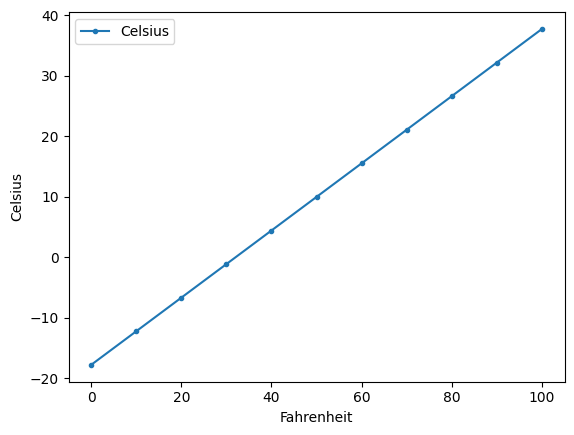

In [12]:
c = lambda f: 5 / 9 * (f - 32)

temps = [(f, c(f)) for f in range(0, 101, 10)]

# import pandas as pd

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')

Components of the Simple Linear Regression Equation
SciPy’s stats Module
Pandas
Seaborn Visualization
Getting Weather Data from NOAA

In [13]:
# Loading the Average High Temperatures into a DataFrame
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

nyc.head()

nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


In [14]:
# Cleaning the Data
nyc.columns = ['Date', 'Temperature', 'Anomaly']

nyc.head(3)

nyc.Date.dtype

nyc.Date = nyc.Date.floordiv(100)

nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [15]:
# Calculating Basic Descriptive Statistics for the Dataset
pd.set_option('display.precision', 2)

nyc.Temperature.describe()

# pd.set_option('precision', 2)
# nyc['Temperature'].describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

In [16]:
# Forecasting Future January Average High Temperatures
# from scipy import stats

linear_regression = stats.linregress(x=nyc.Date,
                                     y=nyc.Temperature)

linear_regression.slope

linear_regression.intercept

linear_regression.slope * 2019 + linear_regression.intercept

linear_regression.slope * 1850 + linear_regression.intercept

np.float64(36.022011329661694)

(10.0, 70.0)

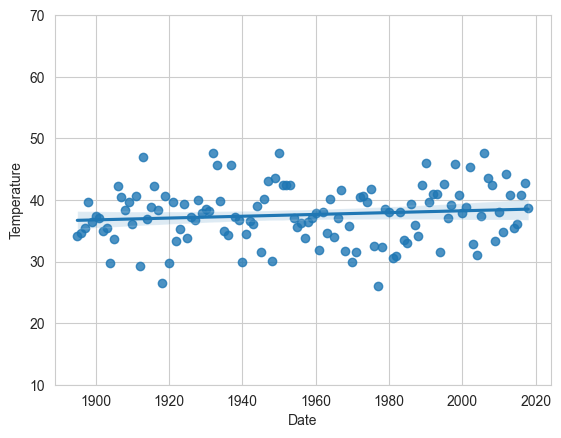

In [17]:
# Plotting the Average High Temperatures and a Regression Line
# import seaborn as sns

sns.set_style('whitegrid')

axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

axes.set_ylim(10, 70)

In [18]:
# Getting Time Series Datasets

# Self Check Exercises 
# Exercise 3
year = 2019

slope = linear_regression.slope

intercept = linear_regression.intercept

temperature = slope * year + intercept

while temperature < 40.0:
    year += 1
    temperature = slope * year + intercept

year

2120